In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def plot_training_curve(filename, exclude_list=None):
    if exclude_list is None:
        exclude_list = list()
        
    base_path = "Experimental_results"
    method_names = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]
    
    for exclude in exclude_list:
        method_names.remove(exclude)

    full_paths = [os.path.join(base_path, method_name, filename) for method_name in method_names]

    datas = [pd.read_csv(full_path) for full_path in full_paths]

    iterations = datas[0]['iteration']

    def plot_subplot(position, metric, y_label, title):
        ax = plt.subplot(3, 2, position)
        for i, method in enumerate(method_names):
            ax.plot(iterations, datas[i][metric], label=method)
        ax.set_title(title)
        ax.set_xlabel('Iterations')
        ax.set_ylabel(y_label)
        ax.legend()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.figure(figsize=(15, 15))

    plot_subplot(1, 'accuracy', 'Accuracy', 'Accuracy over Iterations')

    plot_subplot(2, 'fpr', 'False Positive Rate', 'FPR over Iterations')

    plot_subplot(3, 'tpr', 'True Positive Rate', 'TPR over Iterations')

    plot_subplot(4, 'ber', 'Balanced Error Rate', 'BER over Iterations')
    
    plot_subplot(5, 'loss', 'Loss', 'Loss over Iterations')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


In [3]:
def plot_training_curve_individual(filename, save_filename=None,exclude_list=None):
    if save_filename is None:
        save_filename = os.path.splitext(filename)[0]
    if exclude_list is None:
        exclude_list = list()

    base_path = "Experimental_results"
    img_path = "experiment_img"  # 目标图形保存路径
    method_names = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

    for exclude in exclude_list:
        method_names.remove(exclude)

    full_paths = [os.path.join(base_path, method_name, filename) for method_name in method_names]

    datas = [pd.read_csv(full_path) for full_path in full_paths]

    iterations = datas[0]['iteration']

    metrics = ['accuracy', 'fpr', 'tpr', 'ber', 'loss']
    titles = {
        'accuracy': 'Accuracy over Iterations',
        'fpr': 'FPR over Iterations',
        'tpr': 'TPR over Iterations',
        'ber': 'BER over Iterations',
        'loss': 'Loss over Iterations'
    }

    # 创建 img 文件夹，如果它不存在的话
    if not os.path.exists(img_path):
        os.makedirs(img_path)

    for metric in metrics:
        plt.figure(figsize=(7, 5))
        for i, method in enumerate(method_names):
            plt.plot(iterations, datas[i][metric], label=method)
        plt.title(titles[metric])
        plt.xlabel('Iterations')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)

        # 保存图形到 img 文件夹下
        plt.savefig(os.path.join(img_path, f"{save_filename}_{metric}.png"))
        plt.close()

# UNSW-NB15
## Training set FedAvg, S-ADMM, FedEM comparison

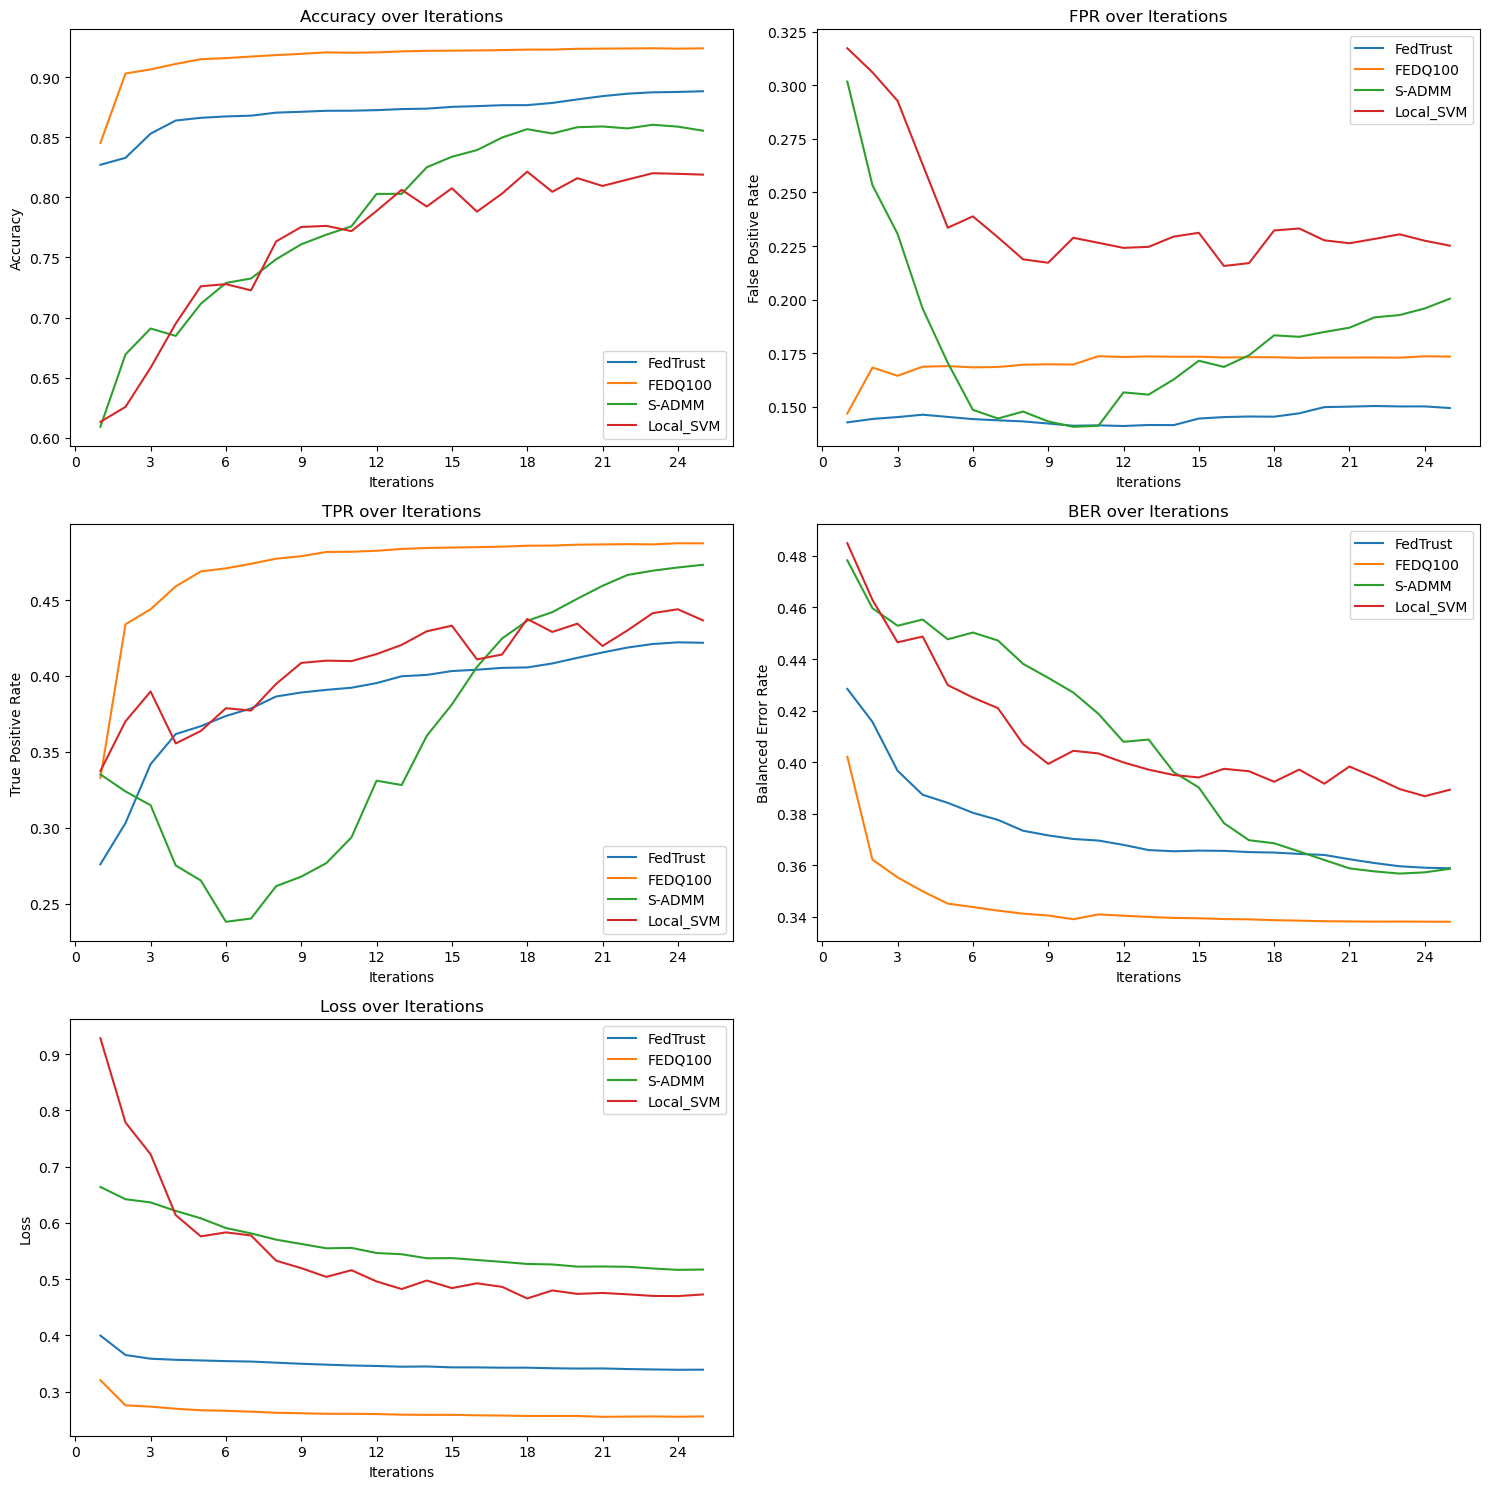

In [4]:
plot_training_curve("train_measures_unsw-nb15.csv", exclude_list=['FEDQ10','FEDQ50','FedEM_random_10','FedEM_random_50', 'FEDQ30', 'FedEM_random_30', 'FedAvg'])

## Validation set FedAvg, S-ADMM, FedEM comparison

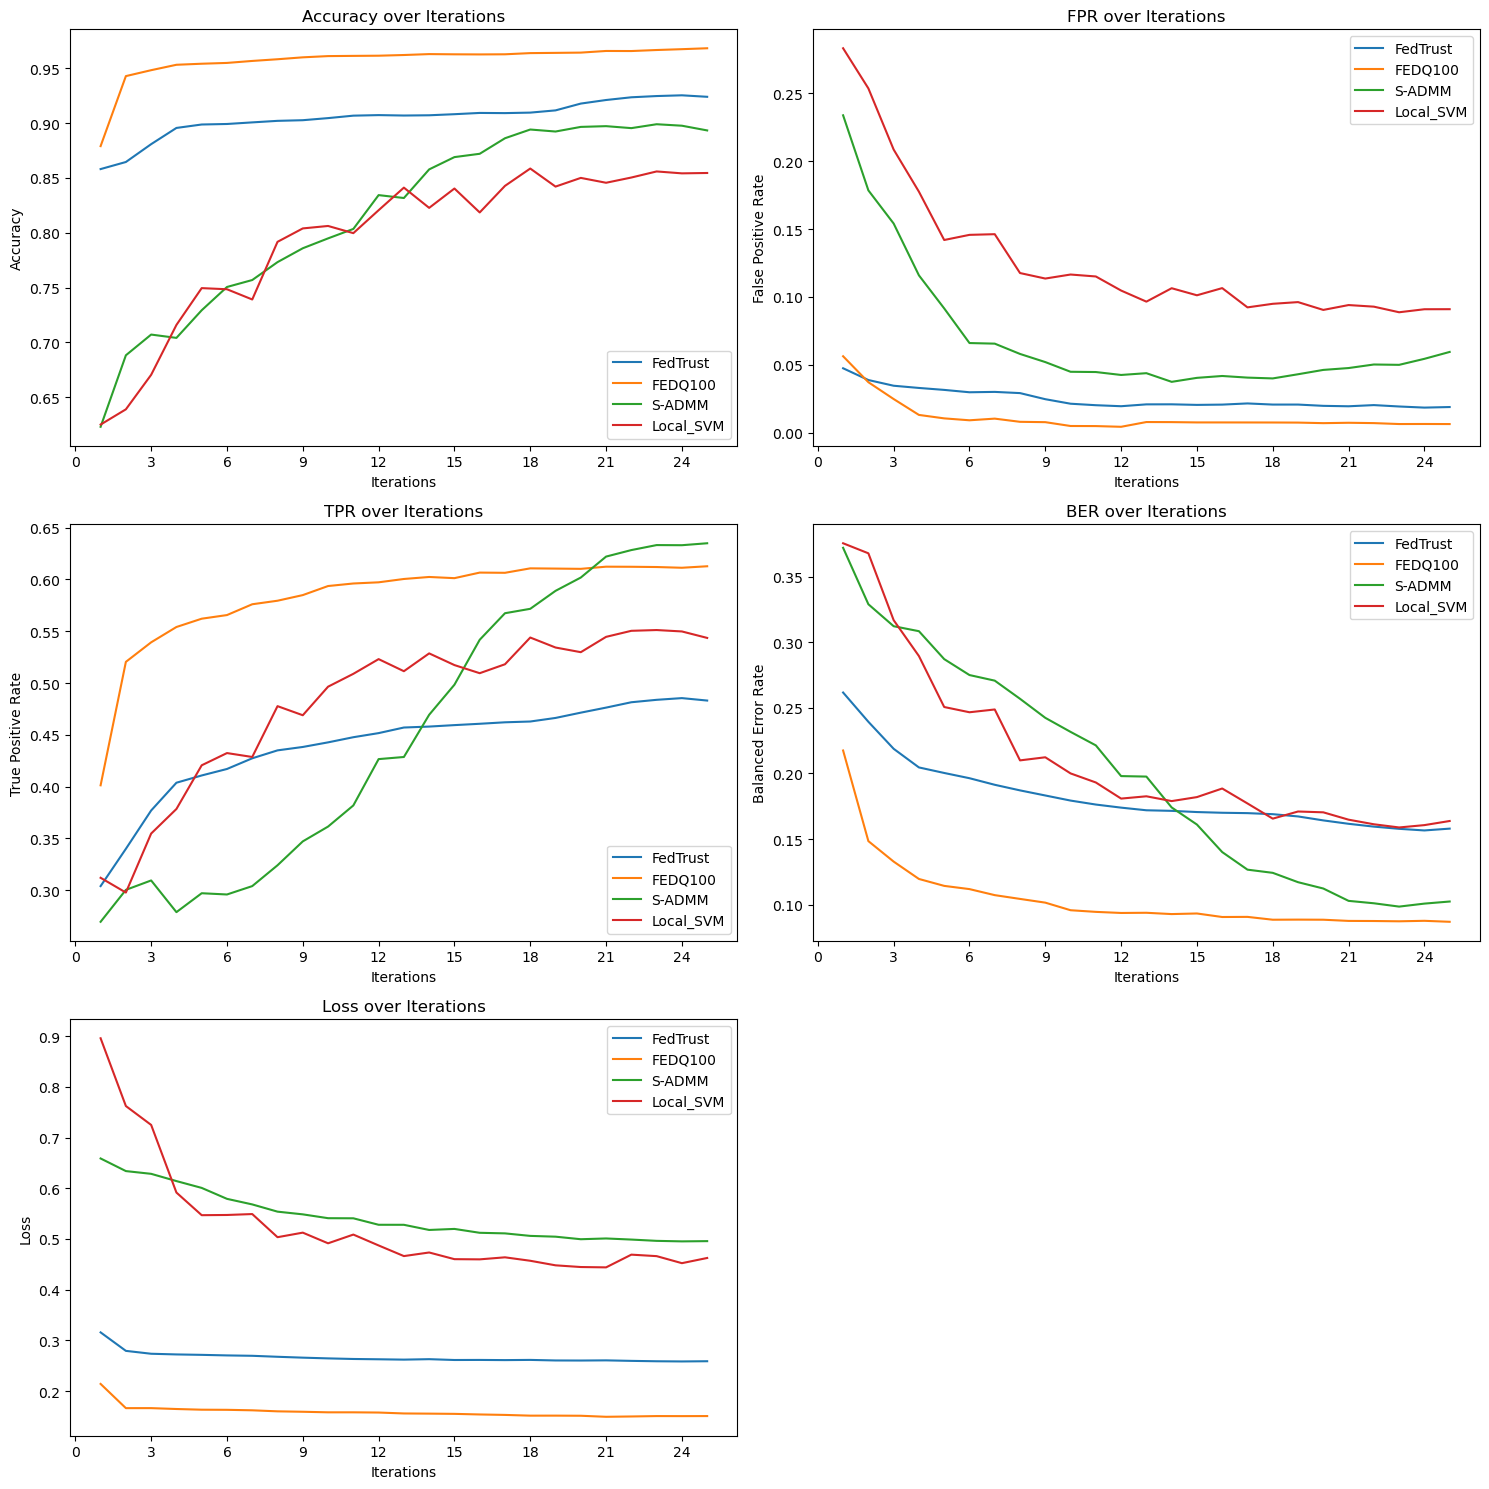

In [5]:
plot_training_curve("val_measures_unsw-nb15.csv", exclude_list=['FEDQ10','FEDQ50','FedEM_random_10','FedEM_random_50','FEDQ30', 'FedEM_random_30', 'FedAvg'])

plot_training_curve_individual("val_measures_unsw-nb15.csv", save_filename="val_measures_unsw-nb15_model_compare", exclude_list=['FEDQ10','FEDQ50','FedEM_random_10','FedEM_random_50','FEDQ30', 'FedEM_random_30', 'FedAvg'])

## Training set FedEM, with DQN, with random comparison

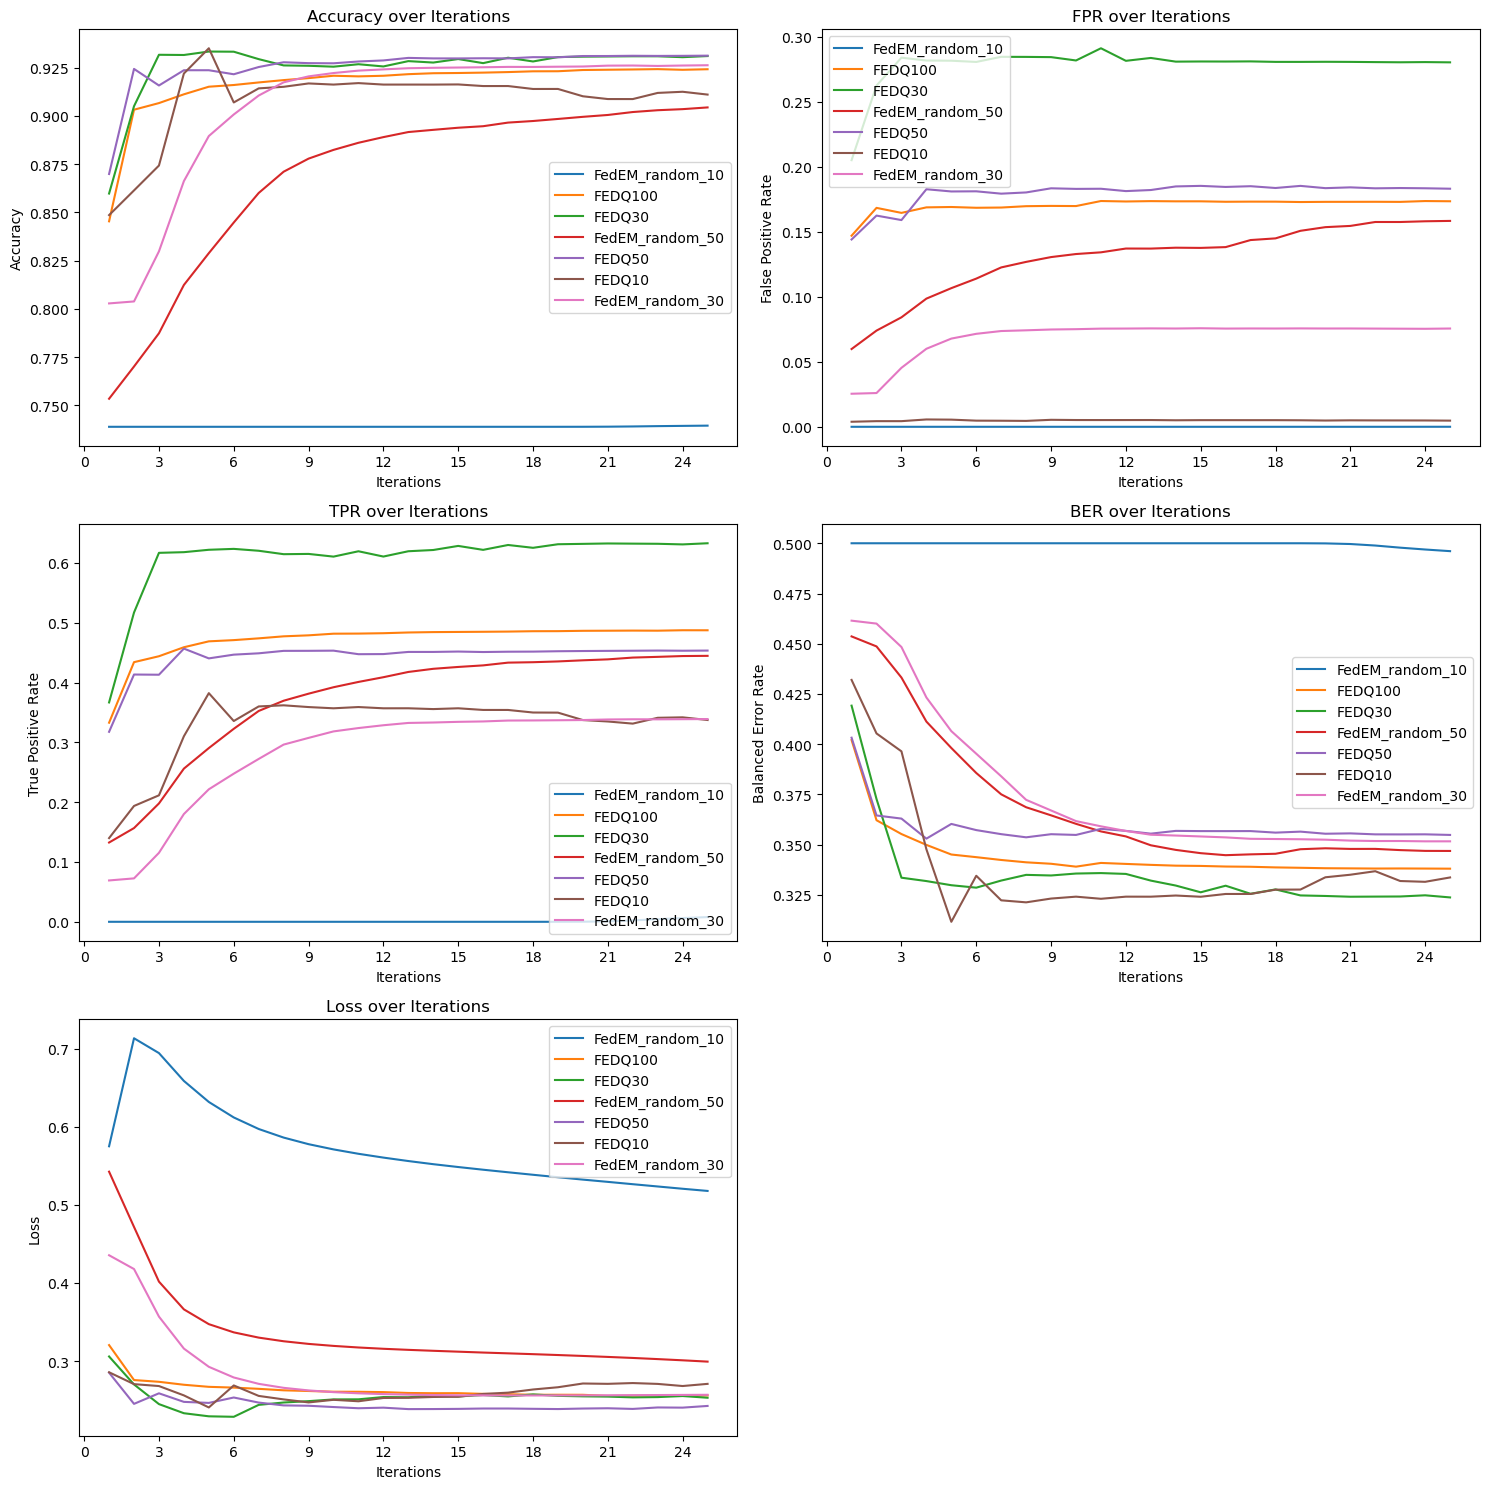

In [6]:
plot_training_curve("train_measures_unsw-nb15.csv", exclude_list=['FedAvg','S-ADMM', 'Local_SVM', 'FedTrust'])

## Validation set FedEM, with DQN, with random comparison

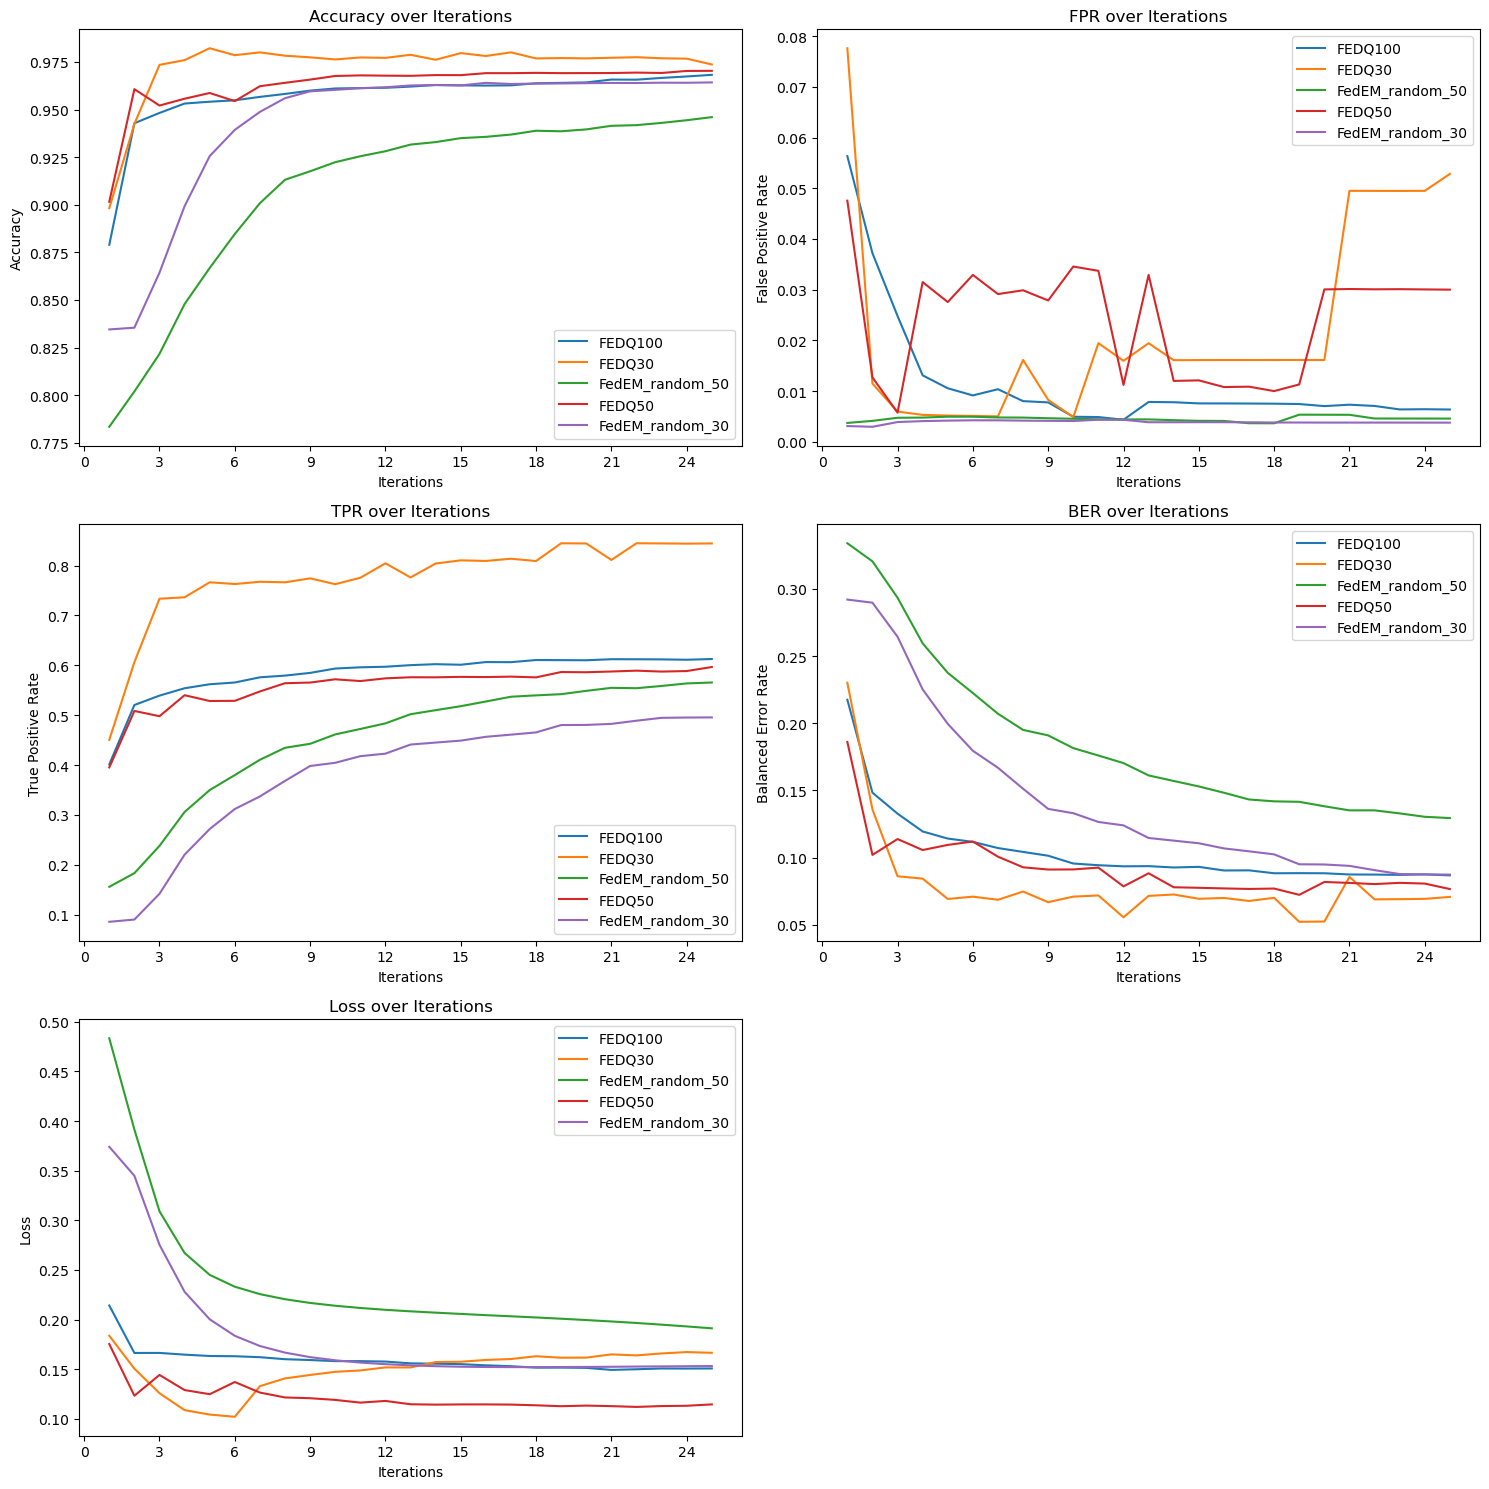

In [7]:
plot_training_curve("val_measures_unsw-nb15.csv", exclude_list=['FedAvg','S-ADMM', 'Local_SVM', 'FedTrust', 'FEDQ10', 'FedEM_random_10'])
plot_training_curve_individual("val_measures_unsw-nb15.csv", save_filename='val_measures_unsw-nb15_select_compare', exclude_list=['FedAvg','S-ADMM', 'Local_SVM', 'FedTrust', 'FEDQ10', 'FedEM_random_10'])

# N-ABIOT
## Training set FedAvg, S-ADMM, FedEM comparison

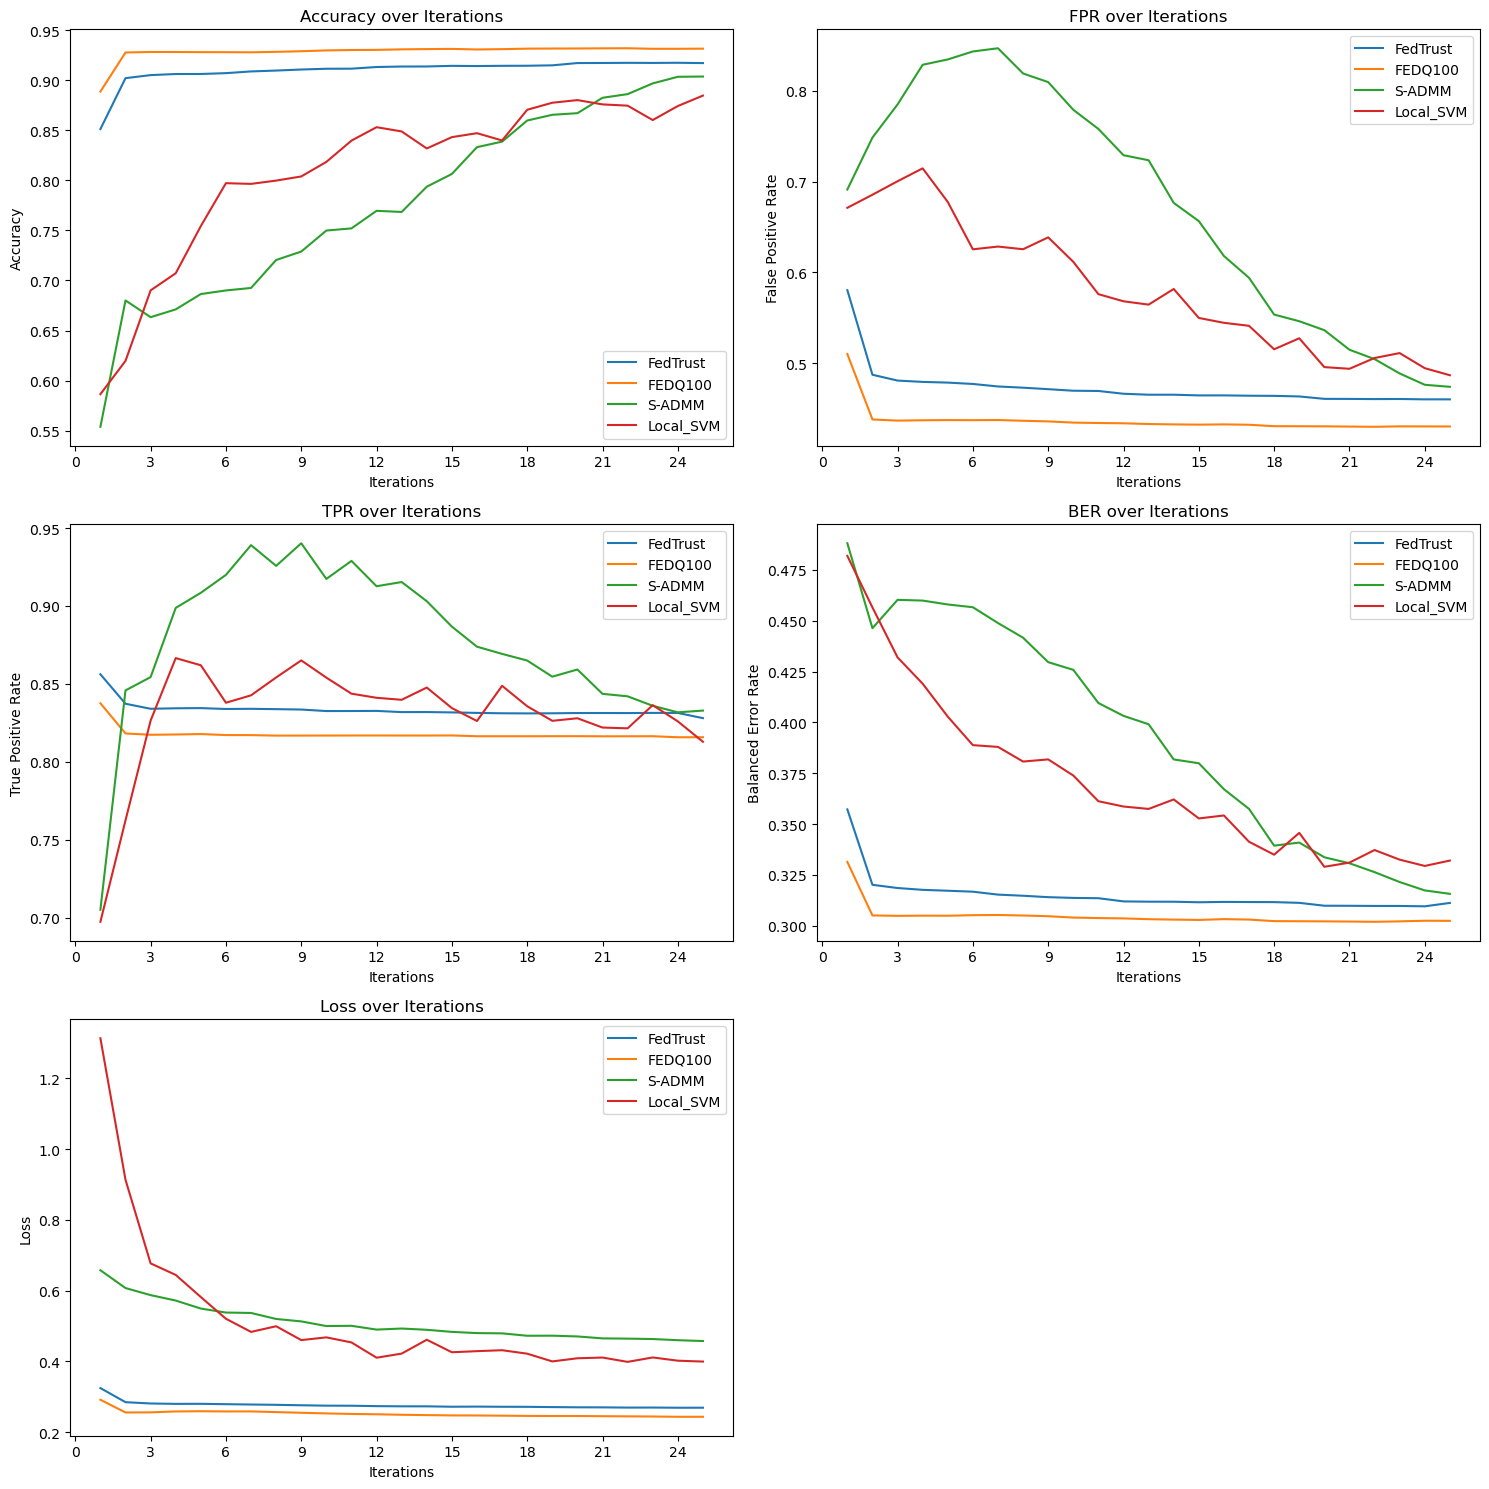

In [8]:
plot_training_curve("train_measures_n-baiot.csv", exclude_list=['FEDQ10','FEDQ50','FedEM_random_10','FedEM_random_50', 'FEDQ30', 'FedEM_random_30', 'FedAvg'])

## Validation set FedAvg, S-ADMM, FedEM comparison

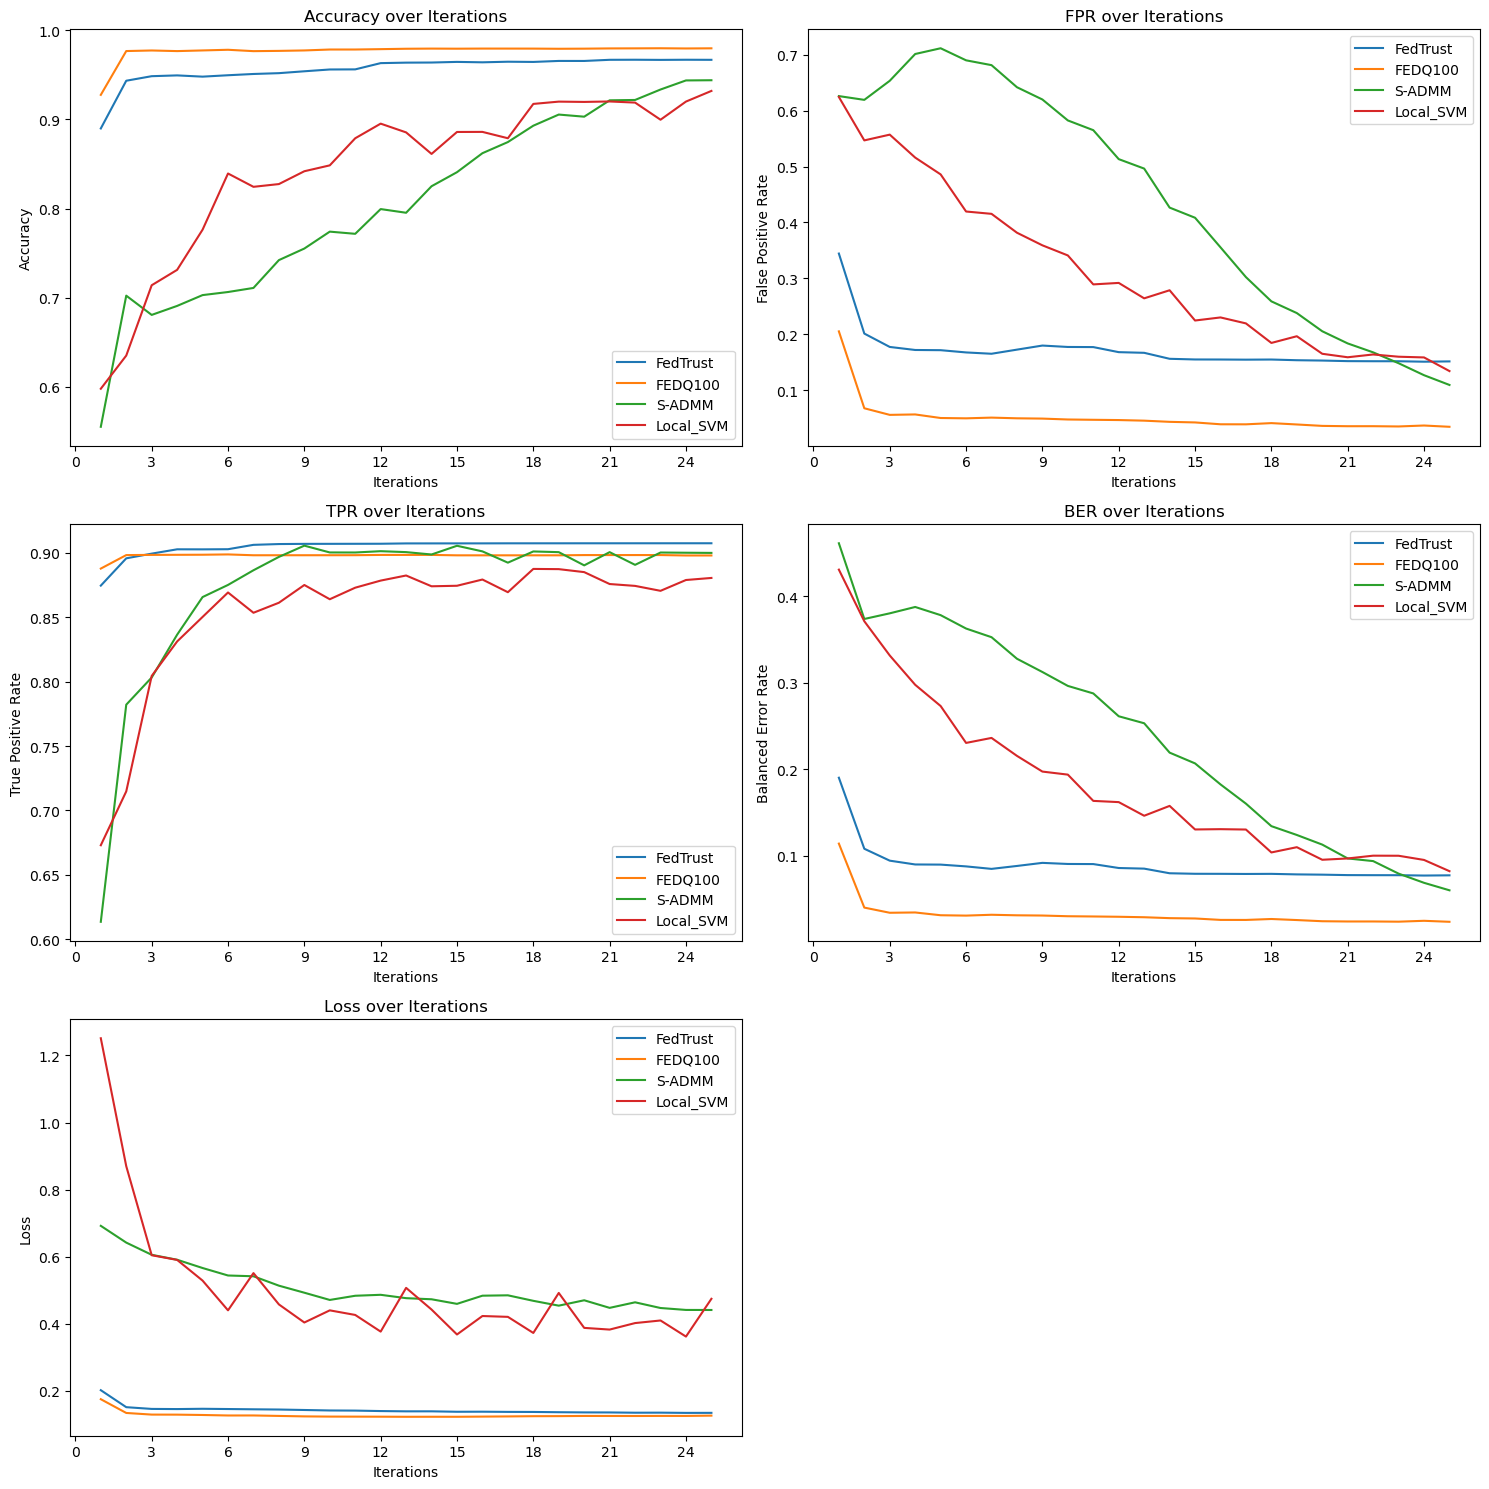

In [9]:
plot_training_curve("val_measures_n-baiot.csv", exclude_list=['FEDQ10','FEDQ50','FedEM_random_10','FedEM_random_50', 'FEDQ30', 'FedEM_random_30', 'FedAvg'])
plot_training_curve_individual("val_measures_n-baiot.csv", save_filename="val_measures_n-baiot_model_compare", exclude_list=['FEDQ10','FEDQ50','FedEM_random_10','FedEM_random_50', 'FEDQ30', 'FedEM_random_30', 'FedAvg'])

## Training set FedEM, with DQN, with random comparison

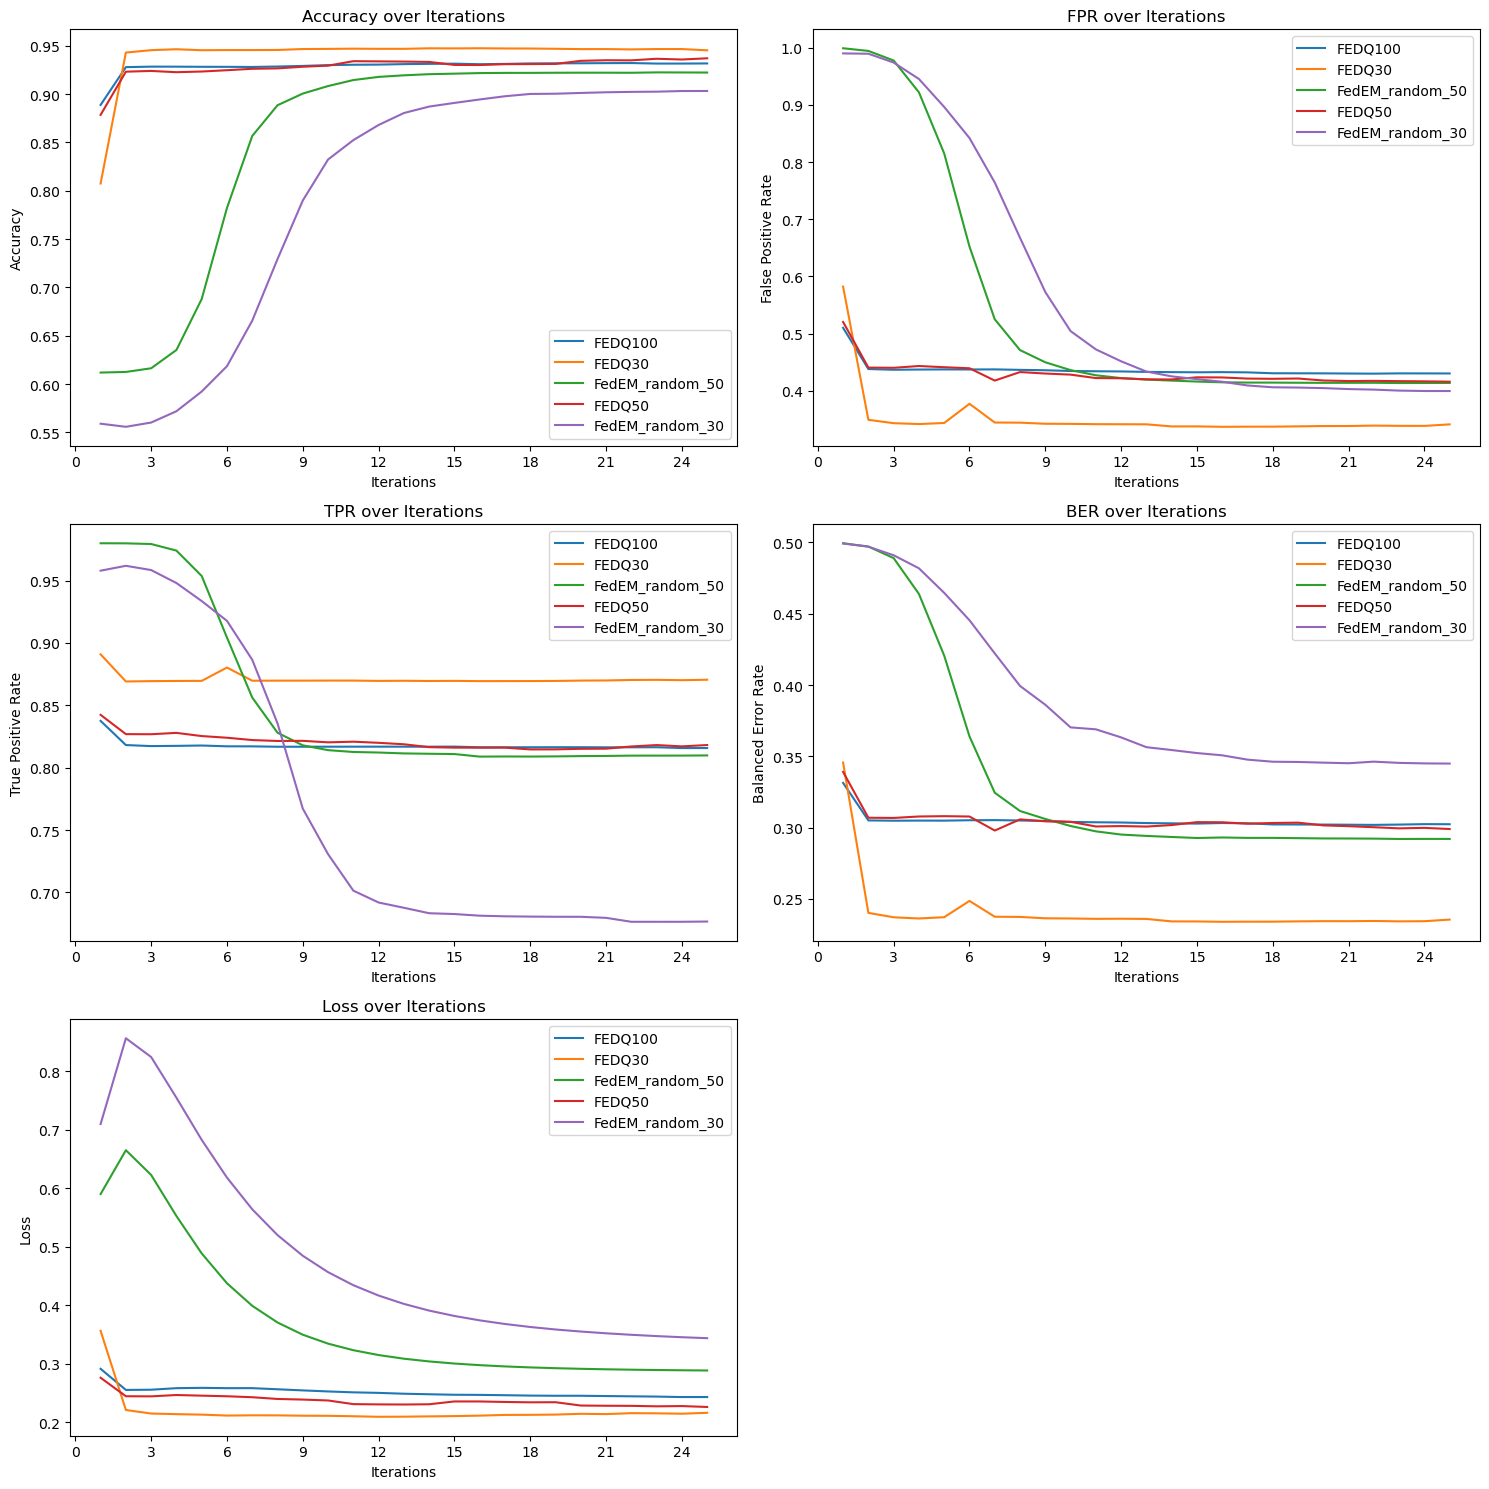

In [10]:
plot_training_curve("train_measures_n-baiot.csv", exclude_list=['FedAvg','S-ADMM', 'Local_SVM', 'FedTrust', 'FEDQ10', 'FedEM_random_10'])

## Validation set FedEM, with DQN, with random comparison

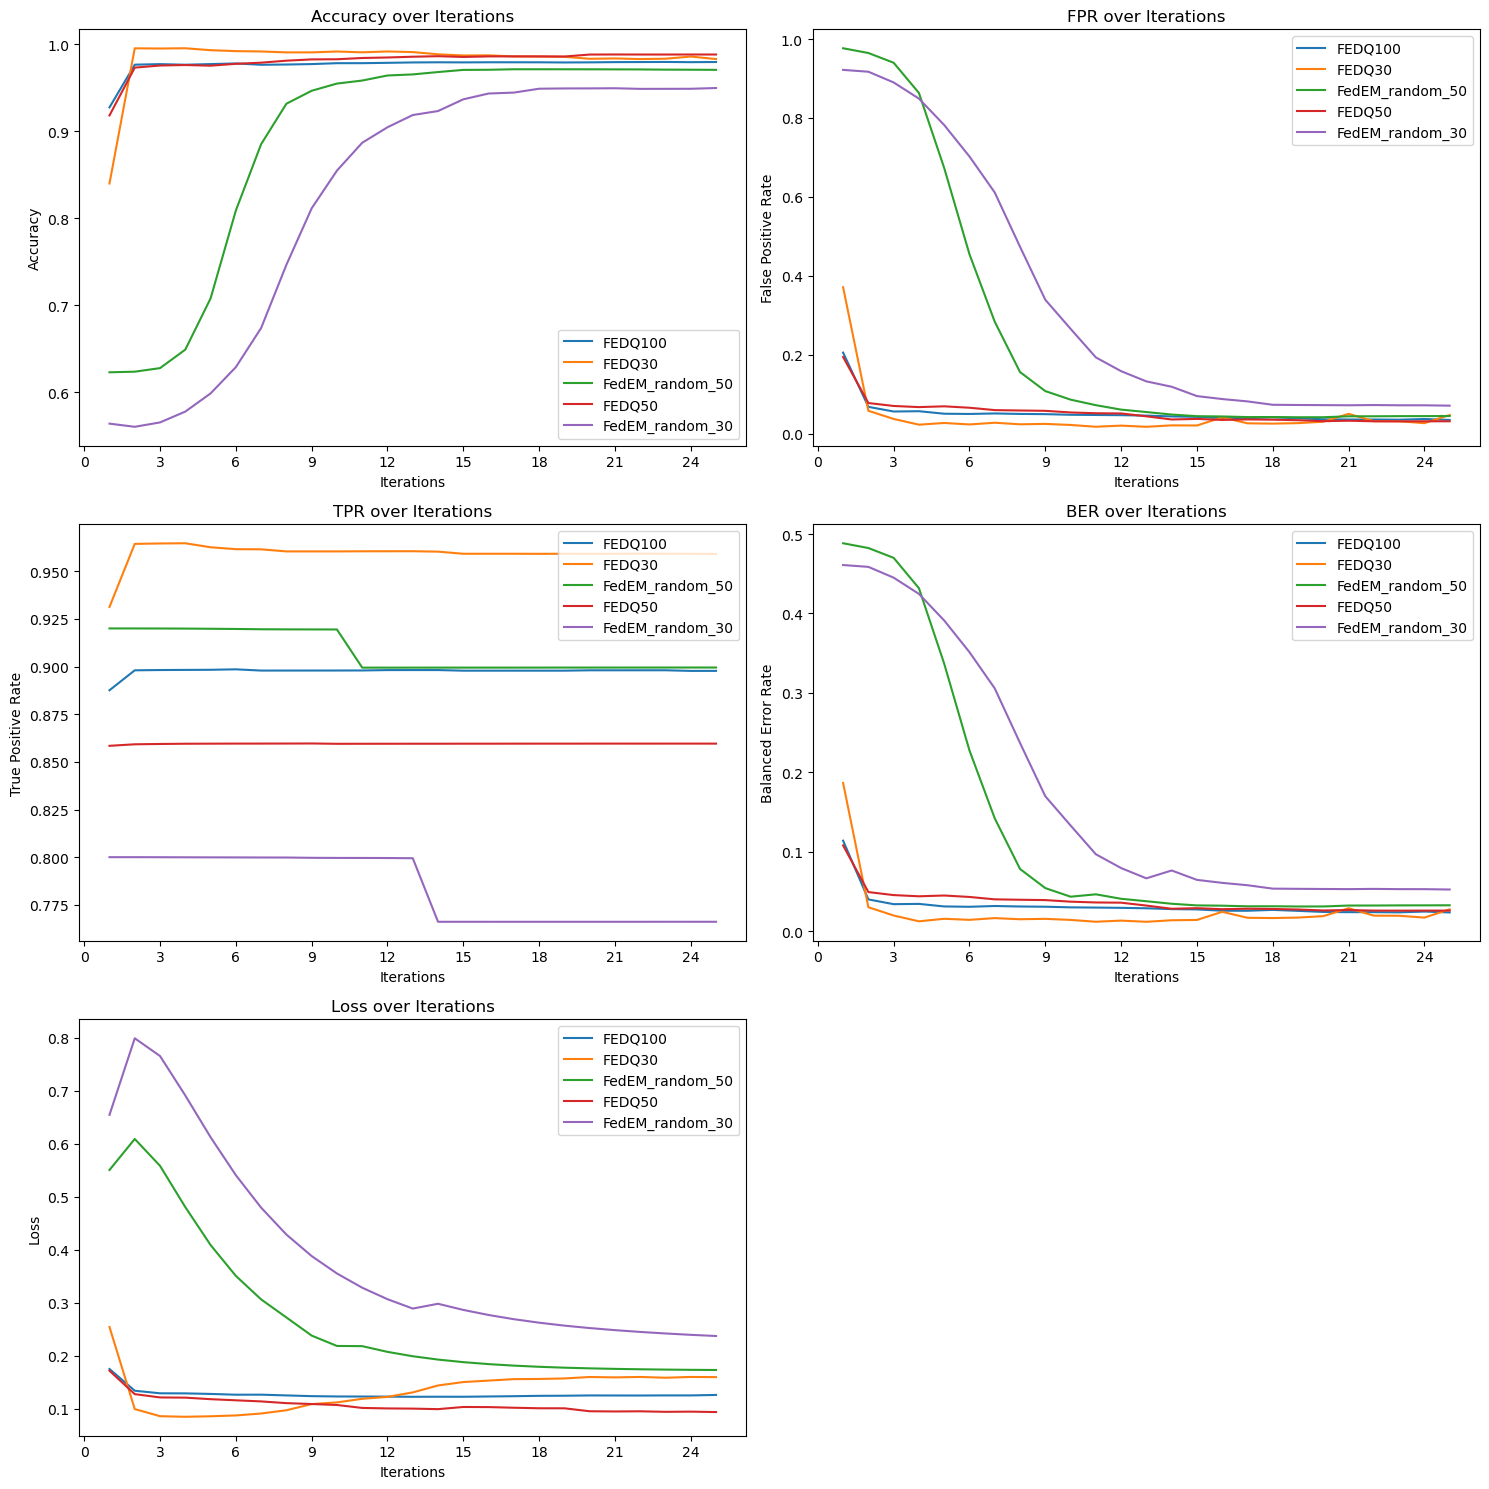

In [11]:
plot_training_curve("val_measures_n-baiot.csv", exclude_list=['FedAvg','S-ADMM', 'Local_SVM', 'FedTrust', 'FEDQ10', 'FedEM_random_10'])
plot_training_curve_individual("val_measures_n-baiot.csv", save_filename="val_measures_n-baiot_select_compare", exclude_list=['FedAvg','S-ADMM', 'Local_SVM', 'FedTrust', 'FEDQ10', 'FedEM_random_10'])